In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import scipy.stats as stats
import seaborn as sn
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
import sys
import scipy
import sklearn
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.stattools import adfuller
from numpy import log
import pmdarima
from pmdarima.arima.utils import ndiffs
import csv 

Par souci de lisibilité, on décide d'ignorer les warnings (déprécation, etc).

In [3]:
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

warnings.filterwarnings("ignore")


# Analyse globale du dataset

In [4]:
data = pd.read_csv('forex_usd_data.csv')

#Affichage du dataset brut
data

,date(y-m-d),Argentine Peso,Australian Dollar,Bahraini Dinar,Botswana Pula,Brazilian Real,Bruneian Dollar,Bulgarian Lev,Canadian Dollar,Chilean Peso,...,Sri Lankan Rupee,Swedish Krona,Swiss Franc,Taiwan New Dollar,Thai Baht,Trinidadian Dollar,Turkish Lira,Emirati Dirham,British Pound,Venezuelan Bolivar
0,2011-01-01,3.969000,0.977326,0.377050,6.472492,1.659500,1.284500,1.463830,0.997700,467.750000,...,110.940002,6.721450,0.934500,29.140000,30.020000,6.340000,1.537400,3.67310,0.640553,4.300000
1,2011-01-02,3.969000,0.977326,0.377050,6.472492,1.659500,1.283500,1.463830,0.997700,467.750000,...,110.940002,6.721450,0.933800,29.099001,30.020000,6.340000,1.537400,3.67310,0.641067,4.300000
2,2011-01-03,3.973500,0.980569,0.377055,6.472492,1.646288,1.284367,1.462799,0.990444,465.649994,...,110.919998,6.693788,0.933069,29.120000,30.084999,6.390000,1.557411,3.67320,0.645615,4.300000
3,2011-01-04,3.971000,0.995580,0.377060,6.480881,1.666747,1.287438,1.469525,0.999076,487.850006,...,110.820000,6.726967,0.947903,29.175004,30.104903,6.360000,1.547801,3.67315,0.641558,4.300000
4,2011-01-05,3.971500,0.999522,0.377050,6.548788,1.670312,1.291450,1.485031,0.994376,495.149993,...,110.820000,6.766127,0.964490,29.170000,30.216193,6.380000,1.543853,3.67310,0.645308,4.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4022,2022-01-05,103.144493,1.377400,0.376000,11.775196,5.683906,1.354650,1.725731,1.270036,837.658195,...,202.147771,9.064884,0.916121,27.603453,33.162219,6.792293,13.628157,3.67250,0.736803,459766.875884
4023,2022-01-06,103.220848,1.395432,0.376000,11.732685,5.702944,1.360617,1.729899,1.272432,836.567108,...,202.107817,9.135556,0.919641,27.682059,33.589961,6.780391,13.760202,3.67250,0.738716,459559.224730
4024,2022-01-07,103.285229,1.391949,0.376000,11.719453,5.628311,1.356006,1.722254,1.264538,830.039118,...,202.886810,9.062225,0.919196,27.679994,33.606164,6.797769,13.830054,3.67250,0.736299,460860.710532
4025,2022-01-08,103.192437,1.392482,0.376000,11.729349,5.636295,1.355453,1.721363,1.264463,828.357793,...,202.151224,9.065324,0.918368,27.624014,33.626684,6.807062,13.872557,3.67250,0.735840,462687.024400


On affiche les dix premières lignes afin d'avoir une première idée des données.

In [5]:
data.head(10)

,date(y-m-d),Argentine Peso,Australian Dollar,Bahraini Dinar,Botswana Pula,Brazilian Real,Bruneian Dollar,Bulgarian Lev,Canadian Dollar,Chilean Peso,...,Sri Lankan Rupee,Swedish Krona,Swiss Franc,Taiwan New Dollar,Thai Baht,Trinidadian Dollar,Turkish Lira,Emirati Dirham,British Pound,Venezuelan Bolivar
0,2011-01-01,3.9690,0.977326,0.377050,6.472492,1.659500,1.284500,1.463830,0.997700,467.750000,...,110.940002,6.721450,0.934500,29.140000,30.020000,6.34,1.537400,3.67310,0.640553,4.3
1,2011-01-02,3.9690,0.977326,0.377050,6.472492,1.659500,1.283500,1.463830,0.997700,467.750000,...,110.940002,6.721450,0.933800,29.099001,30.020000,6.34,1.537400,3.67310,0.641067,4.3
2,2011-01-03,3.9735,0.980569,0.377055,6.472492,1.646288,1.284367,1.462799,0.990444,465.649994,...,110.919998,6.693788,0.933069,29.120000,30.084999,6.39,1.557411,3.67320,0.645615,4.3
3,2011-01-04,3.9710,0.995580,0.377060,6.480881,1.666747,1.287438,1.469525,0.999076,487.850006,...,110.820000,6.726967,0.947903,29.175004,30.104903,6.36,1.547801,3.67315,0.641558,4.3
4,2011-01-05,3.9715,0.999522,0.377050,6.548788,1.670312,1.291450,1.485031,0.994376,495.149993,...,110.820000,6.766127,0.964490,29.170000,30.216193,6.38,1.543853,3.67310,0.645308,4.3
5,2011-01-06,3.9725,1.004114,0.377055,6.578948,1.688198,1.294907,1.500927,0.995765,495.350006,...,110.800003,6.859084,0.963382,29.270000,30.264999,6.33,1.553250,3.67315,0.645509,4.3
6,2011-01-07,3.9735,1.004783,0.377055,6.631300,1.686150,1.294726,1.511231,0.993527,497.649994,...,110.820000,6.902419,0.965455,29.357000,30.359801,6.33,1.572761,3.67310,0.642732,4.3
7,2011-01-08,3.9760,1.003210,0.377050,6.631300,1.683500,1.294500,1.514830,0.993000,497.500000,...,110.820000,6.937900,0.967200,29.360000,30.320000,6.33,1.571900,3.67300,0.643335,4.3
8,2011-01-09,3.9760,1.003512,0.377050,6.631300,1.683500,1.294500,1.514830,0.993300,497.500000,...,110.820000,6.933900,0.967200,29.360000,30.320000,6.33,1.571900,3.67300,0.643335,4.3
9,2011-01-10,3.9760,1.006770,0.377040,6.653360,1.693000,1.298848,1.511403,0.992724,498.750000,...,110.769997,6.881667,0.968713,29.268000,30.709919,6.33,1.580967,3.67315,0.641967,4.3


Par souci d'intégrité, il faut vérifier que le dataset ne comporte pas de données manquantes.

In [6]:
data.isnull().sum()

date(y-m-d)              0
Argentine Peso           0
Australian Dollar        0
Bahraini Dinar           0
Botswana Pula            0
Brazilian Real           0
Bruneian Dollar          0
Bulgarian Lev            0
Canadian Dollar          0
Chilean Peso             0
Chinese Yuan Renminbi    0
Colombian Peso           0
Croatian Kuna            0
Czech Koruna             0
Danish Krone             0
Euro                     0
Hong Kong Dollar         0
Hungarian Forint         0
Icelandic Krona          0
Indian Rupee             0
Indonesian Rupiah        0
Iranian Rial             0
Israeli Shekel           0
Japanese Yen             0
Kazakhstani Tenge        0
South Korean Won         0
Kuwaiti Dinar            0
Libyan Dinar             0
Malaysian Ringgit        0
Mauritian Rupee          0
Mexican Peso             0
Nepalese Rupee           0
New Zealand Dollar       0
Norwegian Krone          0
Omani Rial               0
Pakistani Rupee          0
Philippine Peso          0
P

Toutes les colonnes sont conformes, à part le Bolivar Vénézuélien, car la colonne comporte deux valeurs manquantes. Il faut donc réaliser un traitement sur le dataset pour éliminer les lignes correspondantes.

In [7]:
data = data[~data.iloc[:, -1].isnull()].copy()

#On revérifie qu'il n'y a plus de valeurs manquantes
data.isnull().sum()

date(y-m-d)              0
Argentine Peso           0
Australian Dollar        0
Bahraini Dinar           0
Botswana Pula            0
Brazilian Real           0
Bruneian Dollar          0
Bulgarian Lev            0
Canadian Dollar          0
Chilean Peso             0
Chinese Yuan Renminbi    0
Colombian Peso           0
Croatian Kuna            0
Czech Koruna             0
Danish Krone             0
Euro                     0
Hong Kong Dollar         0
Hungarian Forint         0
Icelandic Krona          0
Indian Rupee             0
Indonesian Rupiah        0
Iranian Rial             0
Israeli Shekel           0
Japanese Yen             0
Kazakhstani Tenge        0
South Korean Won         0
Kuwaiti Dinar            0
Libyan Dinar             0
Malaysian Ringgit        0
Mauritian Rupee          0
Mexican Peso             0
Nepalese Rupee           0
New Zealand Dollar       0
Norwegian Krone          0
Omani Rial               0
Pakistani Rupee          0
Philippine Peso          0
P

<AxesSubplot:>

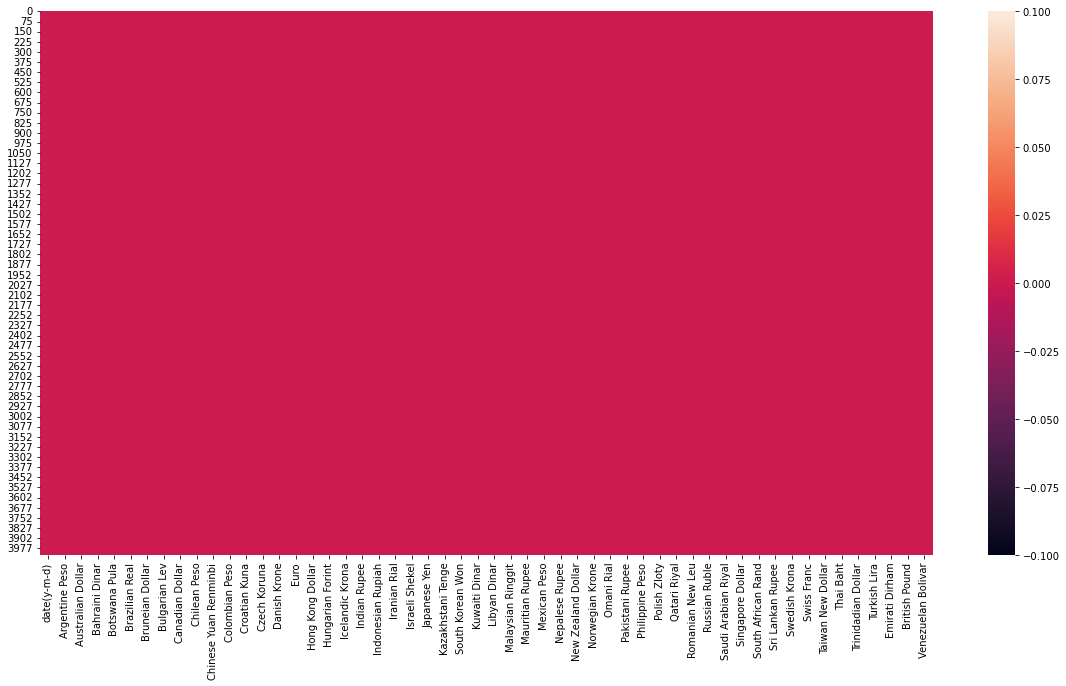

In [8]:
plt.figure(figsize=(20, 10))
sn.heatmap(data.isnull(), cbar=True)

Toutes les valeurs manquantes ont maintenant été gérées. On peut maintenant s'intéresser au type de données qu'on traite.

In [9]:
data.size #permet d'obtenir le nombre d'éléments que contient le dataset

217350

In [10]:
data.shape

(4025, 54)

<AxesSubplot:ylabel='None'>

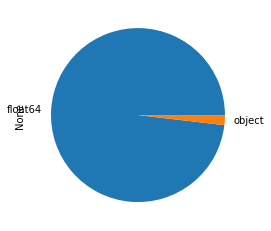

In [11]:
data.dtypes.value_counts().plot.pie()

Il est également intéressant d'afficher une visualisation numérique des données du dataset.

In [12]:
data.describe()

,Argentine Peso,Australian Dollar,Bahraini Dinar,Botswana Pula,Brazilian Real,Bruneian Dollar,Bulgarian Lev,Canadian Dollar,Chilean Peso,Chinese Yuan Renminbi,...,Sri Lankan Rupee,Swedish Krona,Swiss Franc,Taiwan New Dollar,Thai Baht,Trinidadian Dollar,Turkish Lira,Emirati Dirham,British Pound,Venezuelan Bolivar
count,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,...,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4.025000e+03
mean,27.892361,1.239292,0.376581,9.721374,3.306950,1.327230,1.628648,1.204216,628.975244,6.513357,...,150.805754,8.016206,0.947567,30.170441,32.263933,6.570500,3.970245,3.672826,0.701452,1.610403e+10
std,29.732671,0.180890,0.001274,1.475142,1.201868,0.060237,0.137156,0.138987,106.981115,0.291296,...,26.765588,1.110342,0.043451,1.251927,1.734233,0.194131,2.414256,0.000349,0.070380,7.271978e+10
min,3.969000,0.907009,0.352206,6.365372,1.534021,1.201029,1.314964,0.944200,455.149994,6.041239,...,109.269997,6.000269,0.729577,27.538020,28.667126,6.079999,1.510495,3.671001,0.582527,4.300000e+00
25%,5.801502,1.067558,0.376000,8.646797,2.224179,1.267701,1.500000,1.046887,517.750000,6.260067,...,130.649957,6.724665,0.917086,29.413728,30.887541,6.380000,2.004656,3.672500,0.635745,6.287699e+00
50%,14.912000,1.302860,0.376979,10.294532,3.239985,1.346179,1.656898,1.263332,647.990020,6.466564,...,145.899994,8.364248,0.953081,30.098166,31.946948,6.654496,2.983793,3.672900,0.706746,9.949813e+00
75%,41.882490,1.378220,0.377048,10.835845,3.968900,1.369473,1.744150,1.317425,698.949575,6.745426,...,177.169977,8.838959,0.982893,30.888119,33.215247,6.760500,5.707952,3.673050,0.766257,9.987500e+00
max,103.290000,1.739537,0.378606,12.286646,5.923027,1.460292,1.884170,1.458843,873.069028,7.178185,...,203.138820,10.367381,1.033671,33.795374,36.490096,6.837211,18.177387,3.675145,0.869677,4.282961e+11


# Analyse locale

### Analyses graphiques

In [13]:
peso = data.columns.get_loc('Turkish Lira')
print(peso)
euro = data.columns.get_loc('Euro')
print(euro)
canadian_dollar = data.columns.get_loc('Canadian Dollar')
print(canadian_dollar)

50
15
8


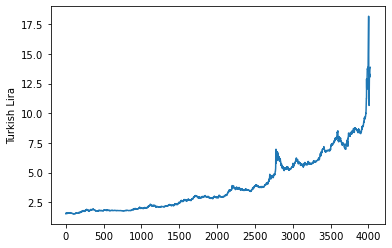

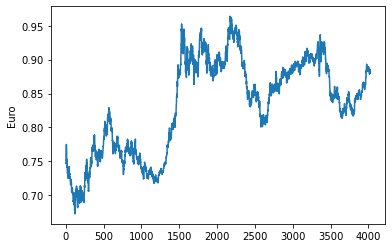

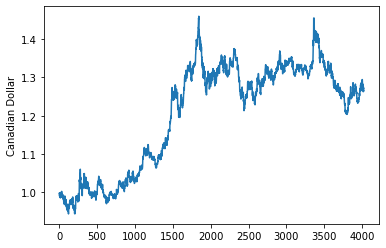

In [14]:
countries = list(data.columns)
index = list(range(len(data[countries[0]])))

plt.plot(index, list(data['Turkish Lira']))
plt.ylabel('Turkish Lira')
plt.show()

plt.plot(index, list(data['Euro']))
plt.ylabel('Euro')
plt.show()

plt.plot(index, list(data['Canadian Dollar']))
plt.ylabel('Canadian Dollar')
plt.show()


<AxesSubplot:xlabel='Canadian Dollar', ylabel='Density'>

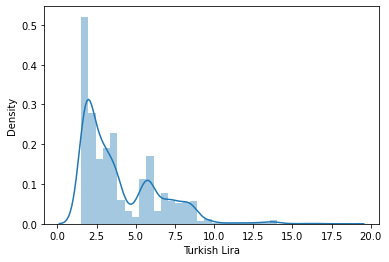

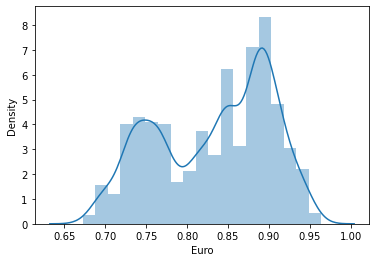

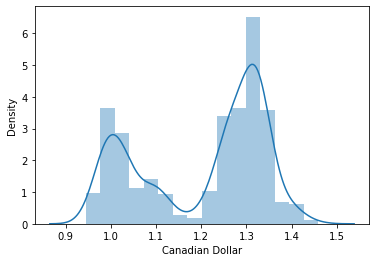

In [15]:
"""for col in data.select_dtypes('float'):
    plt.figure()
    sn.distplot(data[col])"""
plt.figure()
sn.distplot(data['Turkish Lira'])

plt.figure()
sn.distplot(data['Euro'])

plt.figure()
sn.distplot(data['Canadian Dollar'])

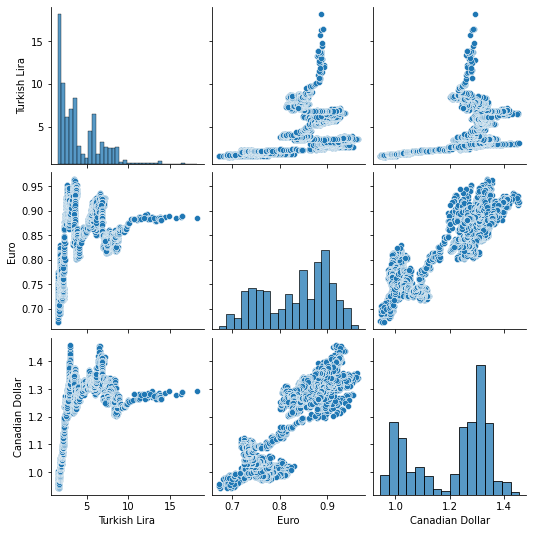

In [16]:
#Pair plot
sn.pairplot(data = data, vars = ['Turkish Lira', 'Euro', 'Canadian Dollar'])
plt.show()

On construit la matrice de corrélation entre le peso argentin, l'euro et le dollar canadien pour observer la relation entre les trois monnaies car celle-ci ne peut pas être observée sur un graphe.

                 Turkish Lira      Euro  Canadian Dollar
Turkish Lira         1.000000  0.471280         0.604417
Euro                 0.471280  1.000000         0.900089
Canadian Dollar      0.604417  0.900089         1.000000


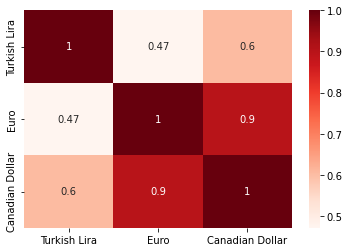

In [17]:
#Creation d'une matrice avec le peso argentin, l'euro et le dollar canadien
corr_mat = data[['Turkish Lira', 'Euro', 'Canadian Dollar']].corr()
print(corr_mat)

sn.heatmap(corr_mat, annot = True, cmap = 'Reds')
plt.show()

Matrice de corrélation de quelques monnaies du dataset :

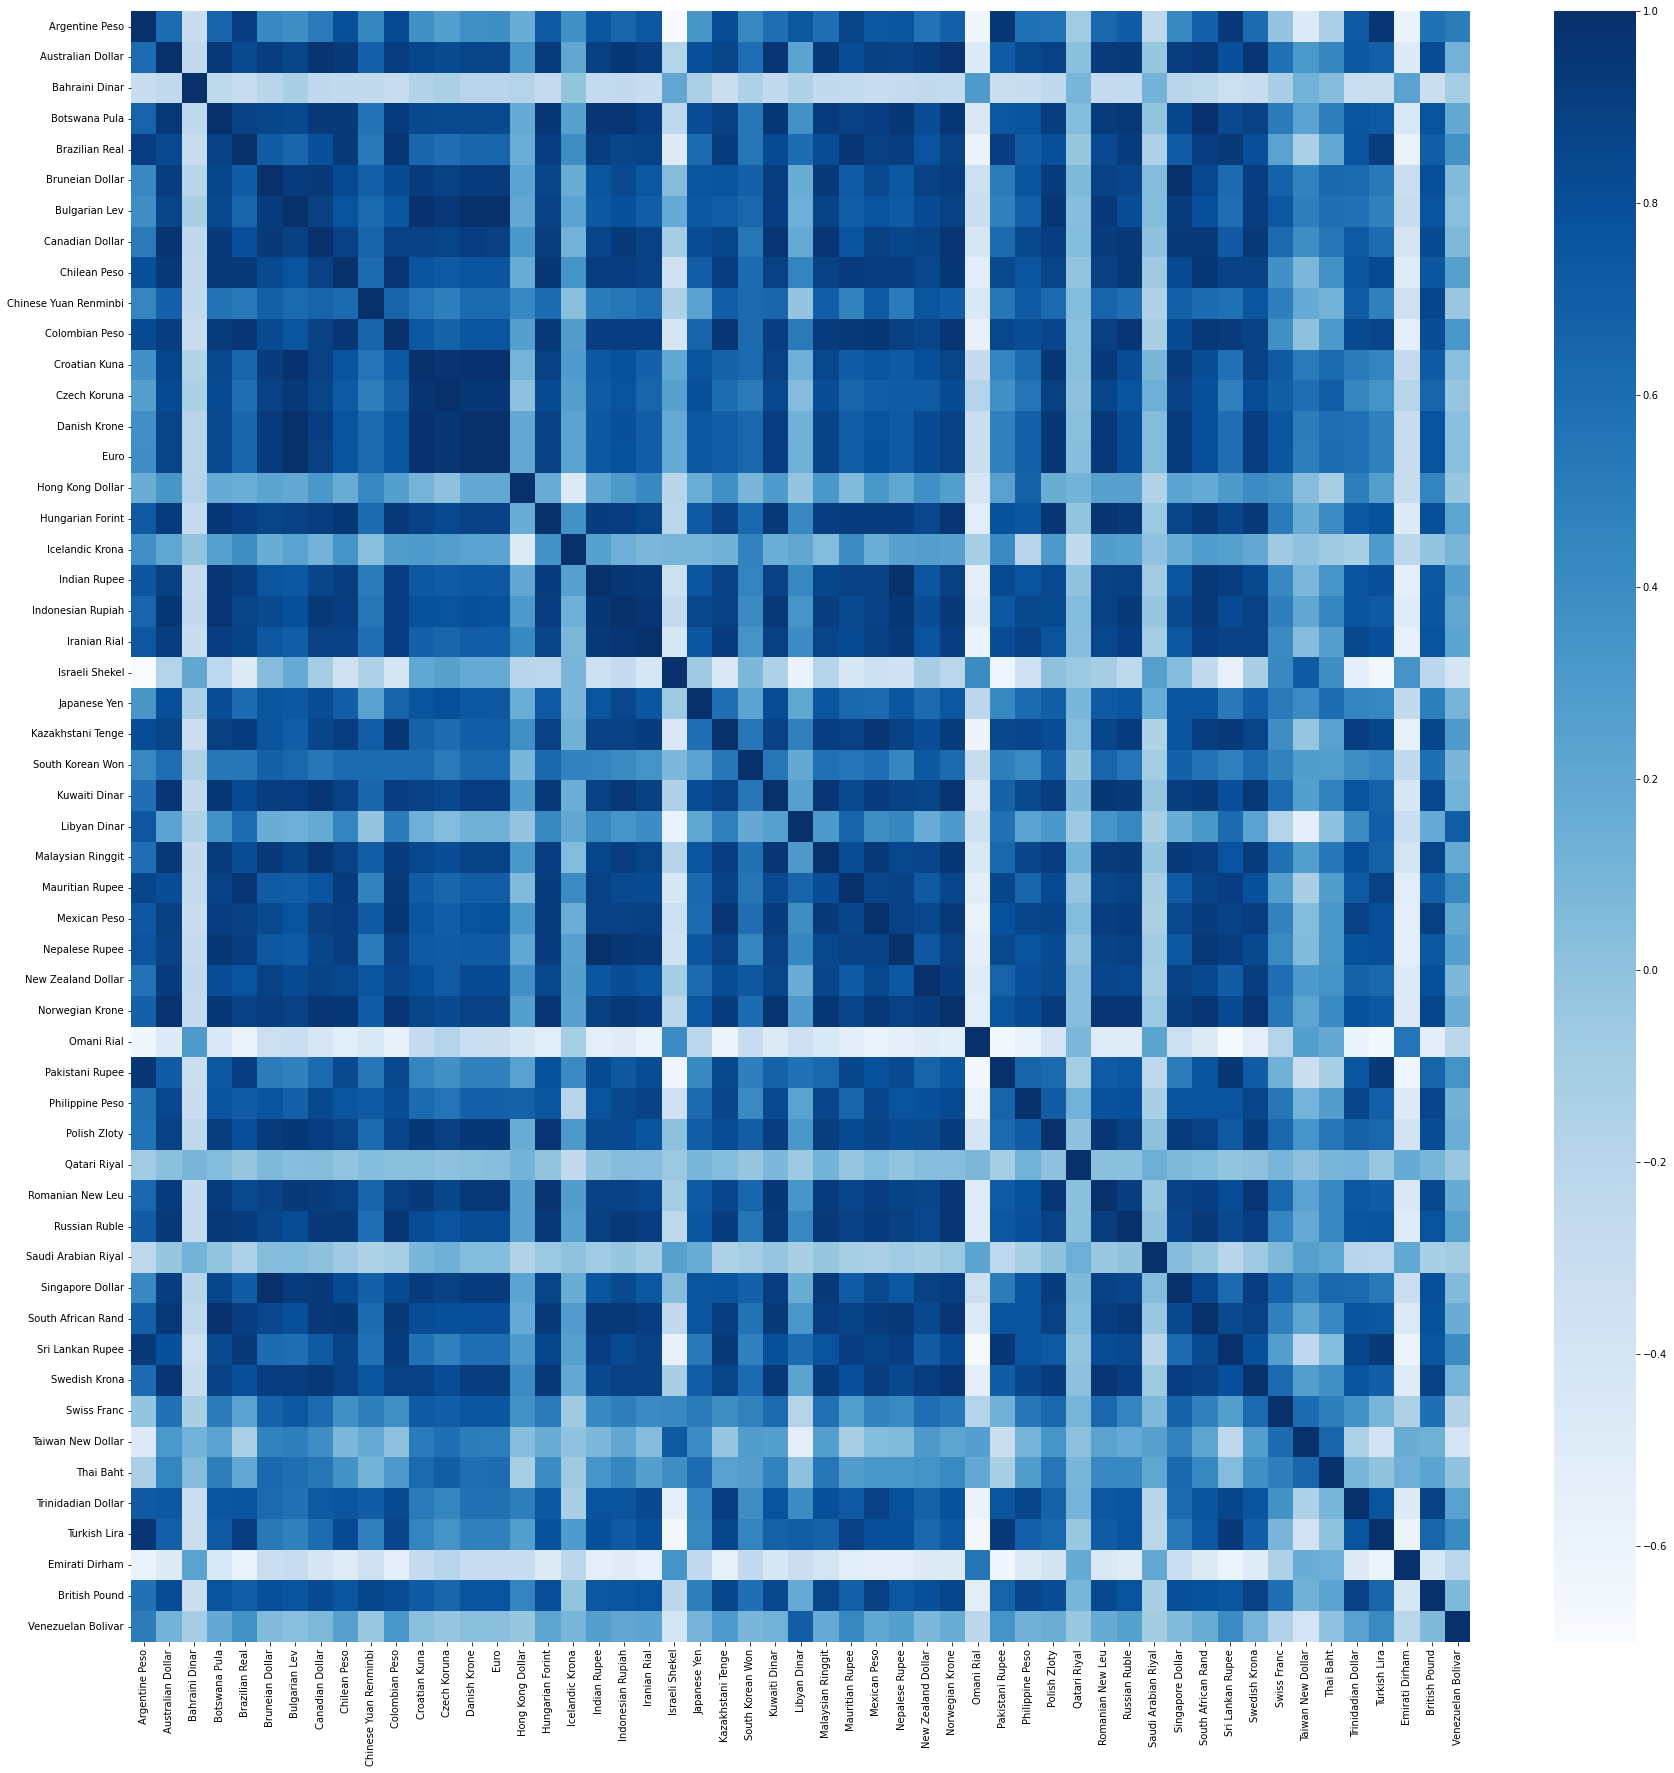

In [18]:
corr = data.corr()

plt.figure(figsize = (30, 30))
sn.heatmap(corr, annot = False, cmap = 'Blues')
plt.show()

### Analyses numériques par catégories

- Cas du lira turque

On commence par calculer la moyenne du dollar USD par rapport au peso argentin, c'est à dire qu'en moyenne, un dollar équivaut à x pesos argentins.

In [19]:
data['Turkish Lira'].mean()

3.970245275527947

Calculons maintenant la valeur médiane de la valeur du dollar USD par rapport au peso argentin.

In [20]:
data['Turkish Lira'].median()

2.983793

Pour approfondir notre compréhension de l'évolution de la valeur du peso argentin en dollars USD, on peut également tracer le box plot des valeurs depuis 2011.

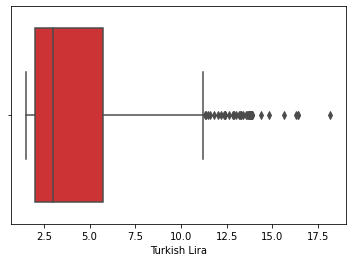

In [21]:
sn.boxplot(data['Turkish Lira'], palette = 'Set1')
plt.show()

- Cas de l'euro

On calcule la moyenne des valeurs :

In [22]:
data['Euro'].mean()

0.8329328852173937

On calcule ensuite la valeur de la médiane :

In [23]:
data['Euro'].median()

0.847364

On peut ensuite tracer le box plot des valeurs de l'euro :

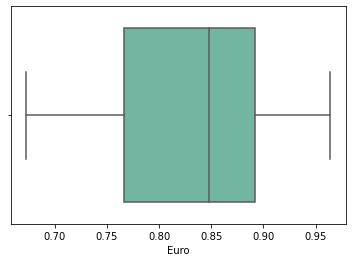

In [24]:
sn.boxplot(data['Euro'], palette = 'Set2')
plt.show()

- Cas du dollar canadien

On calcule la moyenne : 

In [25]:
data['Canadian Dollar'].mean()

1.2042158824844773

On peut également calculer la médiane :

In [26]:
data['Canadian Dollar'].median()

1.263332

Enfin, on construit le box plot :

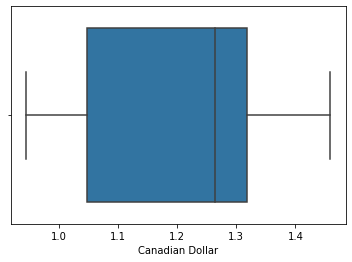

In [27]:
sn.boxplot(data['Canadian Dollar'])
plt.show()

# Prédictions et détection de changement

- Entropie relative

In [28]:
x1 = data['Turkish Lira']
x2 = data['Euro']
x3 = data['Canadian Dollar']

y1 = (x1, x2)
y2 = (x2,x3)
y3 = (x1,x3)

m_cov = np.cov(y1,y2,y3)
print(m_cov)


[[5.82863012e+00 7.99485064e-02 7.99485064e-02 2.02812867e-01]
 [7.99485064e-02 4.93737069e-03 4.93737069e-03 8.79040022e-03]
 [7.99485064e-02 4.93737069e-03 4.93737069e-03 8.79040022e-03]
 [2.02812867e-01 8.79040022e-03 8.79040022e-03 1.93174936e-02]]


On essaie de calculer la divergence de Kullback Leiber en utilisant une fonction que nous appellerons EKL.

In [29]:
def EKL(e1,e2):
    m1 = np.mean(e1)
    m2 = np.mean(e2)
    std1 = np.std(e1)
    std2 = np.std(e2)
  
    return 0.5*((m1-m2)**2)/(std1**2 + std2**2) + 0.5*(std1**2/std2**2 + std2**2/std1**2) - 1

In [30]:
print(EKL(x1, x2))
print(EKL(x1, x3))
print(EKL(x2, x3))

590.1007446452971
150.5200101625431
3.9264745943241506


- Modèle ARIMA

--> Cas du peso argentin

In [31]:
result = adfuller(data['Turkish Lira'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 2.447675
p-value: 0.999031


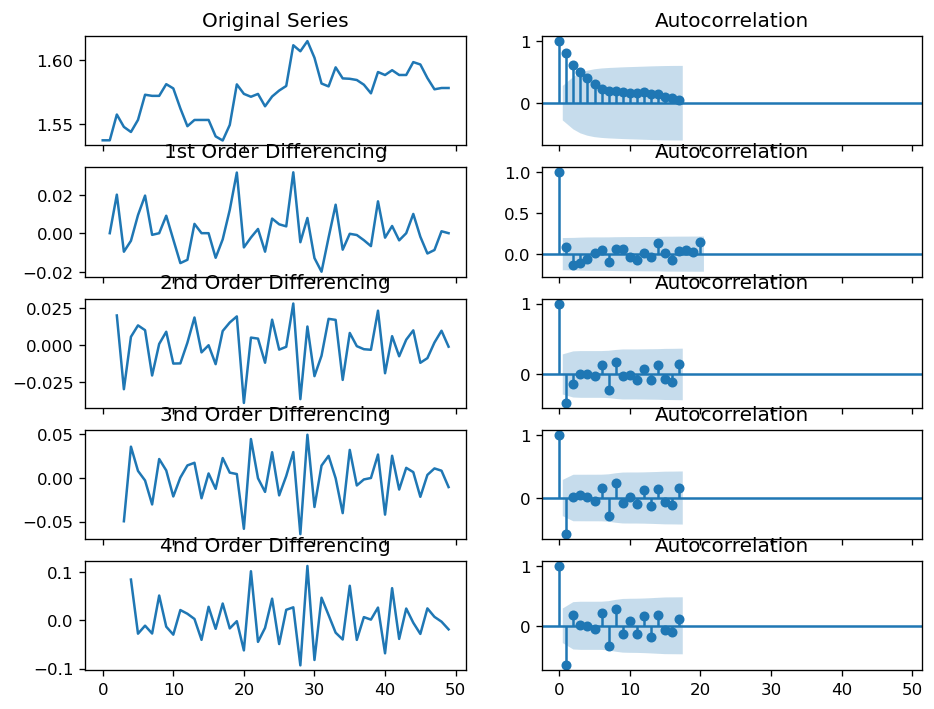

In [32]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(5, 2, sharex=True)
axes[0, 0].plot(data['Turkish Lira'][:50]); axes[0, 0].set_title('Original Series')
plot_acf(data['Turkish Lira'][:50], ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(data['Turkish Lira'][:50].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(data['Turkish Lira'][:100].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(data['Turkish Lira'][:50].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(data['Turkish Lira'][:50].diff().diff().dropna(), ax=axes[2, 1])


# 3nd Differencing
axes[3, 0].plot(data['Turkish Lira'][:50].diff().diff().diff()); axes[3, 0].set_title('3nd Order Differencing')
plot_acf(data['Turkish Lira'][:50].diff().diff().diff().dropna(), ax=axes[3, 1])

# 4nd Differencing
axes[4, 0].plot(data['Turkish Lira'][:50].diff().diff().diff().diff()); axes[4, 0].set_title('4nd Order Differencing')
plot_acf(data['Turkish Lira'][:50].diff().diff().diff().diff().dropna(), ax=axes[4, 1])


plt.show()

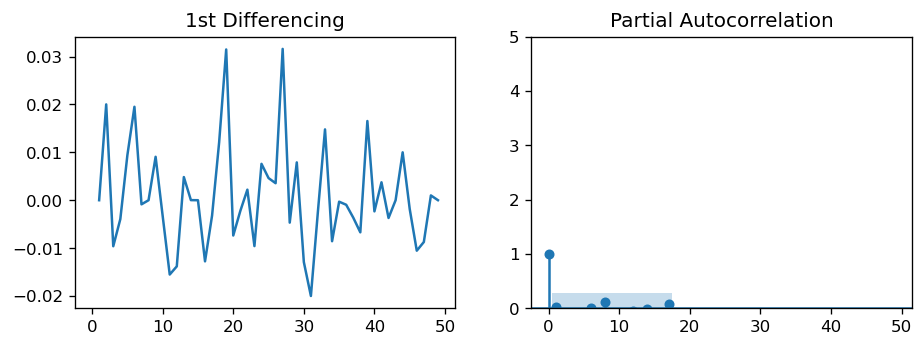

In [59]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(data['Turkish Lira'][:50].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(data['Turkish Lira'][:50].diff().dropna(), ax=axes[1])

plt.show()

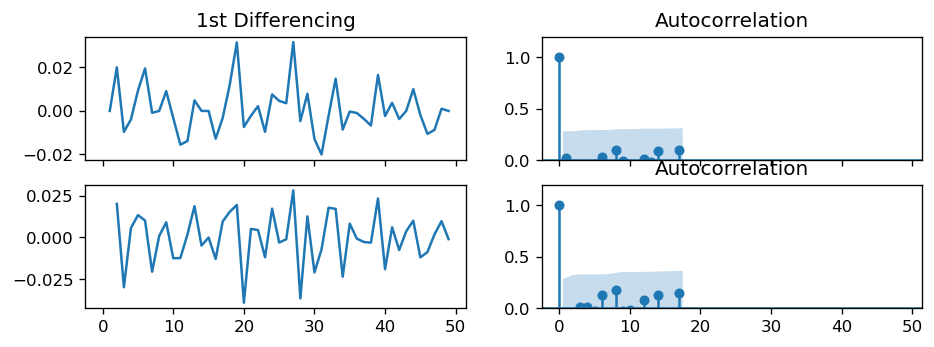

In [63]:
fig, axes = plt.subplots(2, 2, sharex=True)
axes[0,0].plot(data['Turkish Lira'][:50].diff()); axes[0,0].set_title('1st Differencing')
axes[0,1].set(ylim=(0,1.2))
plot_acf(data['Turkish Lira'][:50].diff().dropna(), ax=axes[0,1])

axes[1,0].plot(data['Turkish Lira'][:50].diff().diff());
axes[1,1].set(ylim=(0,1.2))
plot_acf(data['Turkish Lira'][:50].diff().diff().dropna(), ax=axes[1,1])

plt.show()


In [33]:
## Adf Test
ndiffs(data['Turkish Lira'][:50], test='adf')  # 2

# KPSS test
ndiffs(data['Turkish Lira'][:50], test='kpss')  # 0

# PP test:
ndiffs(data['Turkish Lira'][:50], test='pp')  # 2

1

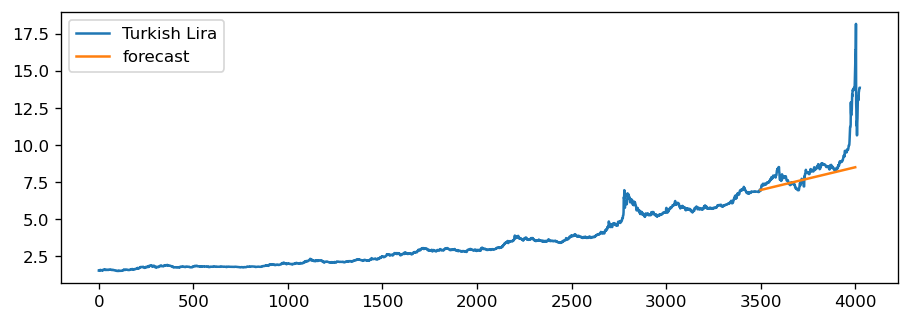

In [68]:
countries = list(data.columns)
index = list(range(len(data[countries[0]])))


dta = data['Turkish Lira']
dta.index = index #pd.DatetimeIndex(start='2011-01-01', end='2022-01-09', freq ='A')
res = sm.tsa.ARIMA(dta, (2, 1, 2)).fit()
fig, ax = plt.subplots()
ax = dta.loc['0':].plot(ax=ax)
fig = res.plot_predict(index[3500], index[4000], dynamic=True, ax=ax, plot_insample=False)
plt.show()